## 2.1 분류와 회귀

classification: 미리 정의된, 여러 class label 중 하나를 예측하는 것.

binary classification 

예. 스팸 메일을 분류하는 것

multiclass classification

예. 붓꽃 데이터셋

regression: 연속적인 숫자(부동소수점수, 실수)를 예측하는 것.

예. 교육수준, 주거지 등을 바탕으로 연간 소득을 예측하는 것. 옥수수 농장의 올해 수확량을 예측하는 것.

출력 값에 연속성이 있는가?

## 2.2 일반화, 과대적합, 과소적합

모델이 처음 보는 데이터를 정확하게 예측한다 = generalization 되었다.

아주 복잡한 모델을 만들면 훈련 세트에만 정확한 모델이 된다 = overfitting

너무 간단한 모델이 선택된다 = underfitting

우리가 찾으려는 모델 = 일반화 성능이 최대가 되는 최적점에 있는 모델. 과대적합과 과소적합의 절충점을 찾아야 한다.

### 2.2.1 모델 복잡도, 데이터셋 크기의 관계

데이터 양을 키우고 모델을 적절하게 복잡하게 만드는 게 가장 좋은 방법 중 하나이다.


## 2.3 지도 학습 알고리즘

### 2.3.1 예제에 사용할 데이터셋

분류: 이진 분류 데이터셋, make_forge()를 사용한다.

/data/data/com.termux/files/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


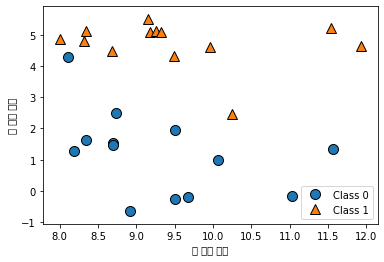

In [7]:
import mglearn 
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend(["Class 0", "Class 1"], loc=4)

plt.xlabel("첫 번째 특성")

plt.ylabel("두 번째 특성")

print("X.shape: {}".format(X.shape))

회귀: wave 데이터셋을 사용한다.

Text(0, 0.5, '타겟')

/data/data/com.termux/files/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/data/data/com.termux/files/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44191 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/data/data/com.termux/files/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0, flags=flags)
/data/data/com.termux/files/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44191 missing from current font.
  font.set_text(s, 0, flags=flags)


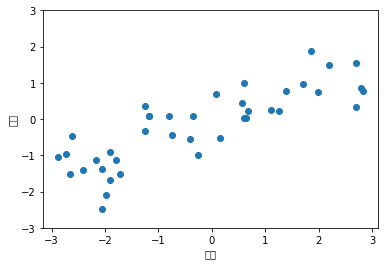

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타겟")

scikit-learn 에 들어 있는 실제 데이터셋 두 개를 사용한다.

cancer: 위스콘신 유방암 데이터셋, 분류 분석에 사용한다.

load_breast_cancer: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [9]:
import sklearn
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


Boston Housing: 보스턴 주택가격 데이터셋, 회귀 분석에 사용한다.

load_boston: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

from sklearn.datasets import load_boston

boston = load_boston()

print("데이터의 형태: {}".format(boston.data.shape))

### 2.3.2 k-NN

#### k-NN 분류

/data/data/com.termux/files/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


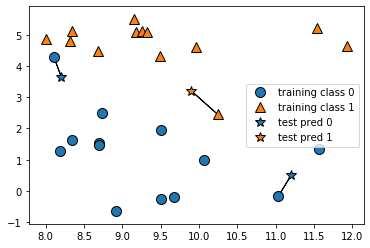

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/data/data/com.termux/files/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


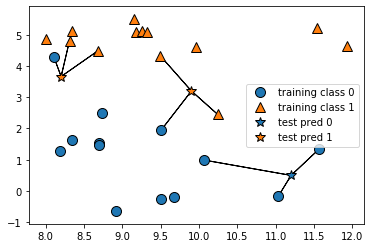

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [15]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/data/data/com.termux/files/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.fit(X_train, y_train)

print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


fit(self, X, y)[source]

Fit the model using X as training data and y as target values



In [18]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


score(self, X, y, sample_weight=None)[source]

Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

x-y 평면에 그려볼 수 있다. 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠한다.

decision boundary를 볼 수 있다.

다음 코드는 n_neighbors=1, 3, 9일 때 결정 경계를 보여준다.

/data/data/com.termux/files/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/data/data/com.termux/files/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/data/data/com.termux/files/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/data/data/com.termux/files/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


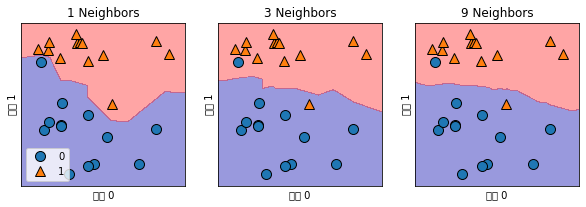

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} Neighbors".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend(loc=3)

matplotlib.pyplot.subplots: [Link](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)

이웃의 개수에 따라 모델의 복잡도가 달라진다.

유방암 데이터 셋을 사용한다.

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

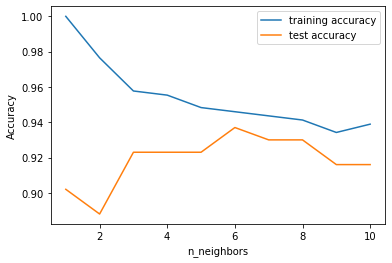

In [21]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### k-NN 회귀

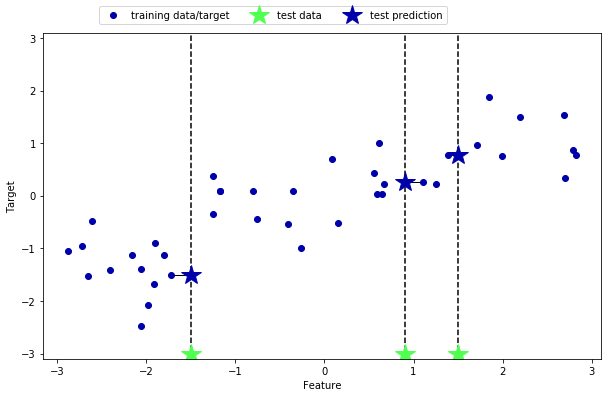

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

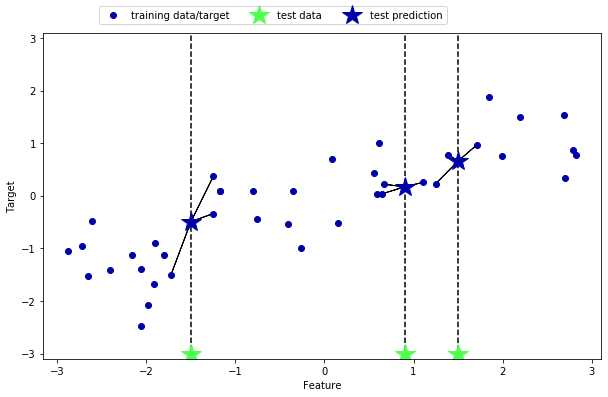

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

scikit-learn에서 회귀를 위한 k-NN 알고리즘은 KNeighborsRegressor에 구현되어 있습니다.

KNeighborsRegressor: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=kneighborsregressor)

In [27]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [29]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


score 메서드를 이용해 모델을 평가할 수 있다. 회귀일 땐 R^2 값을 반환한다. 결정계수라고도 하는 R^2 값은 회귀 모델에서 예측의 적합도를 0과 1 사이의 값으로 계산한 것이다. 1은 예측이 완벽한 경우이고, 0은 훈련 세트의 출력 값인 y_train의 평균으로만 예측하는 모델의 경우이다.

score(self, X, y, sample_weight=None)[source]

Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [30]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


#### KNeighborsRegressor 

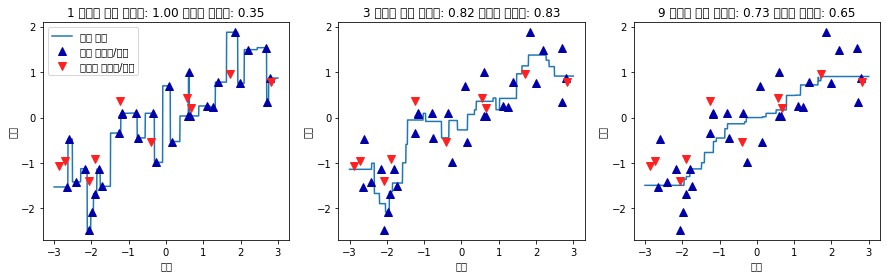

In [33]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")


#### k-NN 장단점

장점: 
- 이해하기 쉬운 모델
- 많이 조정하지 않아도 자주 좋은 성능을 발휘
- 더 복잡한 알고리즘을 적용해 보기 전 시도해 볼 수 있는 좋은 시작점

단점:
- 훈련 세트가 매우 크면 예측이 느려짐.
- 데이터를 전처리 하는 과정이 중요함
- 많은 특성을 가진 데이터셋에 잘 동작하지 않고, sparse 한 데이터셋에 특히 잘 동작하지 않음.

위와 같은 단점으로 현업에서 잘 사용하지 않고, 대신 선형 모델을 

### 2.3.3 선형 모델

입력 특성에 대한 선형 함수를 만들어 예측을 수행

#### 회귀의 선형 모델

특성이 하나인 데이터셋이라면 다음과 같이 표현할 수 있다.

$y = ax + b$

w[0]: 0.393906  b: -0.031804


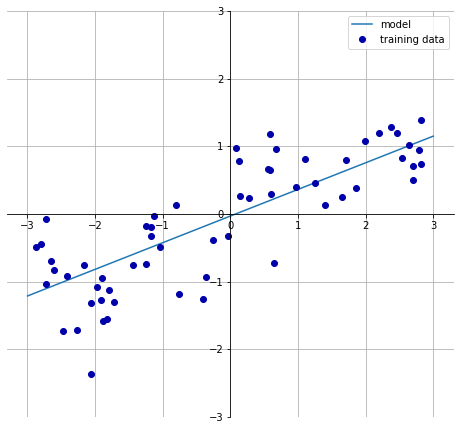

In [34]:
mglearn.plots.plot_linear_regression_wave()

머신러닝에서 알고리즘이 주어진 데이터로부터 학습하는 파라미터를 모델 파라미터, 파라미터 혹은 계수 라고 부릅니다. 사람이 직접 설정해 주어야 하는 파라미터를 하이퍼 파라미터 라고 합니다. 이런 하이퍼파라미터는 파이썬 클래스와 함수에 넘겨주는 인수에 포함되므로 통칭하여 매개변수라고 부르겠습니다.

훈련 데잍ㅓ보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 (훈련 세트에 대해서) 선형 함수로 모델링할 수 있습니다.

#### 선형 회귀(최소 제곱법)

linear regression 또는 OLS, ordinary least squares은 간단하고 오래된 회귀용 선형 알고리즘입니다. 

MSE, mean squared error를 최소화하는 파라미터 w, b를 찾습니다.

선형 회귀는 매개변수가 없는 것이 장점ㅇ리지만, 그래서 모델의 복잡도를 제어할 방법도 없습니다.

In [35]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

LinearRegression: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)[source]

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.



기울기 파라미터 w는 
- 가중치 weight 또는 계수 coefficient라고 하며 
- lr 객체의 coef_ 속성에 저장되어 있습니다.

편향 offset 또는 절편 intercept 파라미터 b는
- intercept_ 속성에 저장되어 있습니다.

In [36]:
lr.coef_, lr.intercept_

(array([0.39390555]), -0.03180434302675976)

intercept_ 속성은 float값 하나이지만, coef_ 속성은 각 입력 특성에 하나씩 대응되는 NumPy 배열입니다.

In [37]:
lr.score(X_train, y_train), \
lr.score(X_test, y_test)

(0.6700890315075756, 0.65933685968637)

$R^2$값이 0.66인 것은 그리 좋은 결과는 아닙니다. 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷함을 알 수 있습니다. 이는 underfitting인 상태를 의미합니다.

특성이 1개인 데이터셋에서는 과대적합을 걱정할 필요가 없습니다. 그러나 고차원 데이터 셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높습니다.

In [38]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [39]:
lr.score(X_train, y_train), \
lr.score(X_test, y_test)

(0.9523526436864239, 0.6057754892935847)

트레인 세트의 $R^2$값은 매우 높게 나왔지만 테스트 세트의 $R^2$값은 매우 낮습니다.

훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과대적합되었다는 확실한 신호입니다.

#### 릿지 회귀

릿지 회귀에서 가중치 $w$ 선택 
- 가중치의 절댓값을 가능한 한 작게 만든다.
- $w$의 모든 원소가 0에 가깝게 되게 한다.

이런 제약을 규제regularization이라 한다. 릿지 회귀에 사용하는 규제 방식을 L2 규제라 

linear_model.Ridge: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)[source]

Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2 

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [41]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

ridge.score(X_train, y_train), \
ridge.score(X_test, y_test)

(0.8860578560395833, 0.7527139600306942)

Ridge 회귀는 덜 자유로운 모델이기 때문에 과대적합이 적어진다.

매개변수의 alpha 값을 통해 모델을 얼마나 단순화할 지 지정해 줄 수 있다. (기본값 1.0)

최적의 alpha 값은 데이터셋에 따라 다르다.